# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Dataset

In [2]:
dataset = pd.read_csv('Car_Purchasing_Data.csv', encoding='ISO-8859-1')

In [3]:
dataset.head()

Customer Name                                    Customer e-mail  \
0    Martina Avila  cubilia.Curae.Phasellus@quisaccumsanconvallis.edu   
1    Harlan Barnes                                eu.dolor@diam.co.uk   
2  Naomi Rodriquez  vulputate.mauris.sagittis@ametconsectetueradip...   
3  Jade Cunningham                            malesuada@dignissim.com   
4     Cedric Leach     felis.ullamcorper.viverra@egetmollislectus.net   

        Country  Gender        Age  Annual Salary  Credit Card Debt  \
0      Bulgaria       0  41.851720    62812.09301      11609.380910   
1        Belize       0  40.870623    66646.89292       9572.957136   
2       Algeria       1  43.152897    53798.55112      11160.355060   
3  Cook Islands       1  58.271369    79370.03798      14426.164850   
4        Brazil       1  57.313749    59729.15130       5358.712177   

     Net Worth  Car Purchase Amount  
0  238961.2505          35321.45877  
1  530973.9078          45115.52566  
2  638467.1773          42925.70921  
3  548599.0524          67422.36313  
4  560304.0671          55915.46248

# Visualize Dataset

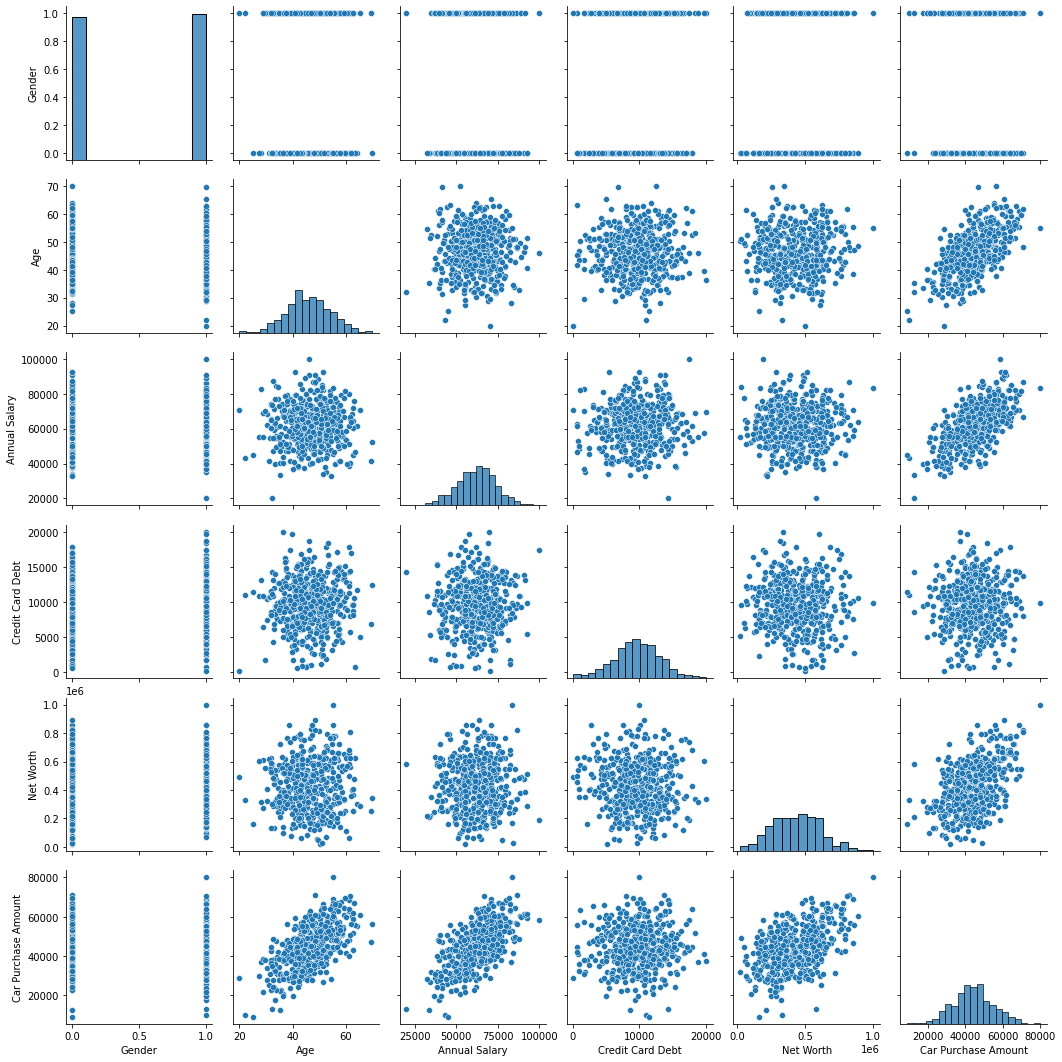

In [4]:
sns.pairplot(dataset)

# Data Cleaning

- UPPER CASE 'X' REPRESENTS INPUT
- lower case 'y' represents output

- Perform Normalization

In [5]:
X = dataset.drop(['Customer Name', 'Customer e-mail', 'Country', 'Car Purchase Amount'], axis=1)
y = dataset['Car Purchase Amount']

In [6]:
X.head()

Gender        Age  Annual Salary  Credit Card Debt    Net Worth
0       0  41.851720    62812.09301      11609.380910  238961.2505
1       0  40.870623    66646.89292       9572.957136  530973.9078
2       1  43.152897    53798.55112      11160.355060  638467.1773
3       1  58.271369    79370.03798      14426.164850  548599.0524
4       1  57.313749    59729.15130       5358.712177  560304.0671

In [7]:
# Normalization
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X_scaled = scale.fit_transform(X)

In [8]:
X_scaled

array([[0.        , 0.4370344 , 0.53515116, 0.57836085, 0.22342985],
       [0.        , 0.41741247, 0.58308616, 0.476028  , 0.52140195],
       [1.        , 0.46305795, 0.42248189, 0.55579674, 0.63108896],
       ...,
       [1.        , 0.67886994, 0.61110973, 0.52822145, 0.75972584],
       [1.        , 0.78321017, 0.37264988, 0.69914746, 0.3243129 ],
       [1.        , 0.53462305, 0.51713347, 0.46690159, 0.45198622]])

In [9]:
scale.data_max_

array([1.e+00, 7.e+01, 1.e+05, 2.e+04, 1.e+06])

In [10]:
scale.data_min_

array([    0.,    20., 20000.,   100., 20000.])

In [11]:
y= y.values.reshape(-1,1)
y_scaled = scale.fit_transform(y)

# Create Train/Test Data

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.25)

# Create Neural Network

In [13]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(40, input_dim=5, activation='relu'))
model.add(Dense(80, activation='relu'))

model.add(Dense(1, activation='linear'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 40)                240       
_________________________________________________________________
dense_1 (Dense)              (None, 80)                3280      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 81        
Total params: 3,601
Trainable params: 3,601
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [16]:
epoch_hist = model.fit(X_train, y_train, epochs=100, batch_size=25, verbose=1, validation_split=0.2)

Epoch 1/100
12/12 [==============================] - 0s 19ms/step - loss: 0.1094 - val_loss: 0.0504
Epoch 2/100
12/12 [==============================] - 0s 4ms/step - loss: 0.0252 - val_loss: 0.0152
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 0.0177 - val_loss: 0.0111
Epoch 4/100
12/12 [==============================] - 0s 3ms/step - loss: 0.0111 - val_loss: 0.0130
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: 0.0091 - val_loss: 0.0083
Epoch 6/100
12/12 [==============================] - 0s 3ms/step - loss: 0.0074 - val_loss: 0.0073
Epoch 7/100
12/12 [==============================] - 0s 3ms/step - loss: 0.0057 - val_loss: 0.0056
Epoch 8/100
12/12 [==============================] - 0s 3ms/step - loss: 0.0044 - val_loss: 0.0045
Epoch 9/100
12/12 [==============================] - 0s 3ms/step - loss: 0.0034 - val_loss: 0.0034
Epoch 10/100
12/12 [==============================] - 0s 4ms/step - loss: 0.0027 - val_loss: 0.0031
Epoch 11

# Evaluate the Model

In [17]:
epoch_hist.history.keys()

dict_keys(['loss', 'val_loss'])

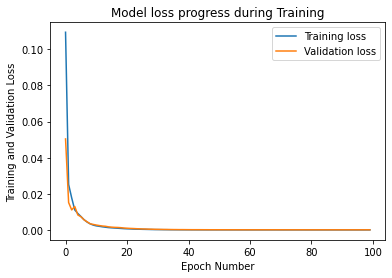

In [18]:
plt.plot(epoch_hist.history['loss'])
plt.plot(epoch_hist.history['val_loss'])
plt.title('Model loss progress during Training')

plt.xlabel('Epoch Number')
plt.ylabel('Training and Validation Loss')

plt.legend(['Training loss', 'Validation loss'])

In [26]:
# Gender, Age, Annual Salary, Credit Card Debt, Net Worth
X_test = np.array([[1,25,50000,23325,100000]])

In [27]:
y_predict = model.predict(X_test)

In [28]:
y_predict

array([[64277.098]], dtype=float32)